In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('C:\\Users\\manue\\Documents\\filiberto\\evaluacionExtracConBD\\datasets\\cliente_tienda.csv')
print(df.head())

   CustomerID  Genero  Edad  Ingresos Anuales ($)  \
0           1    Male    19                    15   
1           2    Male    21                    15   
2           3  Female    20                    16   
3           4  Female    23                    16   
4           5  Female    31                    17   

   Porcentajde de gastos (1-100)  
0                             39  
1                             81  
2                              6  
3                             77  
4                             40  


Preparamos los datos. Usamos Edad, Ingresos, Gastos. Escalamos.

In [4]:
X = df[['Edad', 'Ingresos Anuales ($)', 'Porcentajde de gastos (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K-Means porque es simple para agrupar clientes por edad e ingresos.

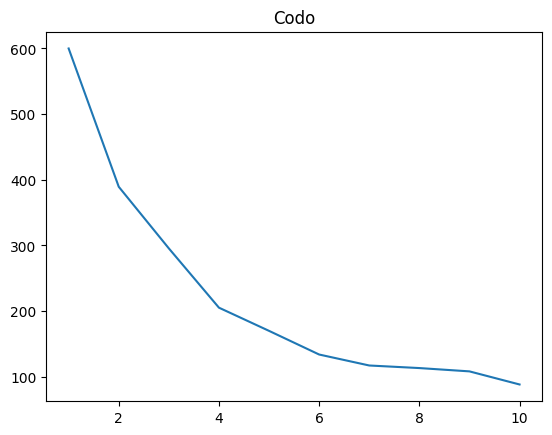

In [5]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(range(1,11), inertia)
plt.title('Codo')
plt.show()

Con la gráfica anterior podemos ver que el mejor para este caso es hacer el modelo con k=4

In [6]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(X_scaled)
df['Cluster'] = clusters

Gráfica resultados

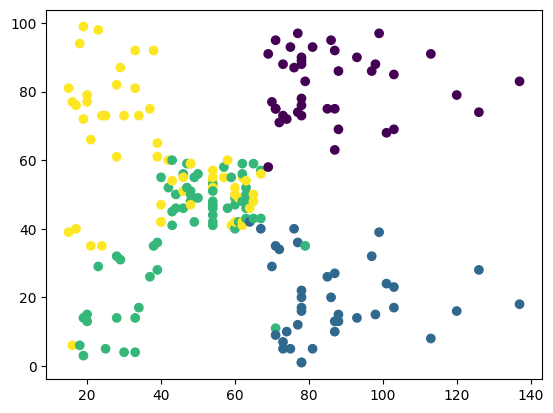

In [7]:
plt.scatter(df['Ingresos Anuales ($)'], df['Porcentajde de gastos (1-100)'], c=clusters)
plt.show()